In [1]:
# import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA,FastICA
np.random.seed(0)

In [2]:
# define the function
def stepwise_kpca(X, gamma, n_components):
    """
    Implementation of a RBF kernel PCA.

    Arguments:
        X: A MxN dataset as NumPy array where the samples are stored as rows (M),
           and the attributes defined as columns (N).
        gamma: A free parameter (coefficient) for the RBF kernel.
        n_components: The number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

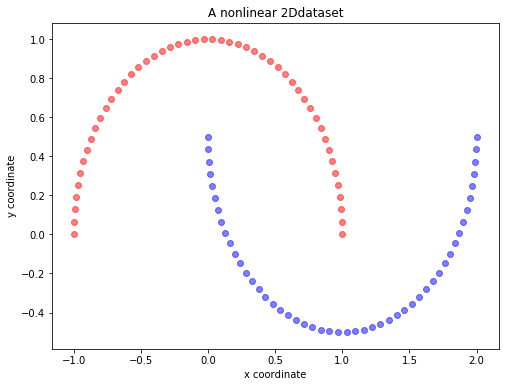

In [3]:
# Create the data and show
X, y = make_moons(n_samples=100, random_state=123)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)

plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

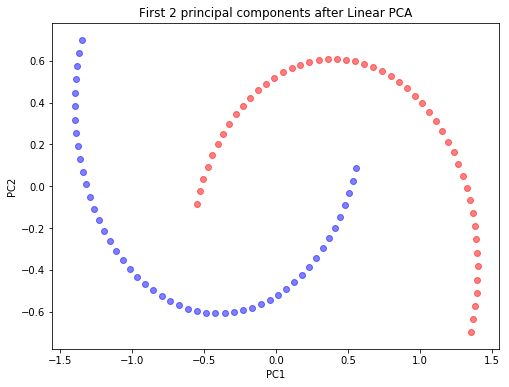

In [4]:
# PCA into 2 Dimesnion
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

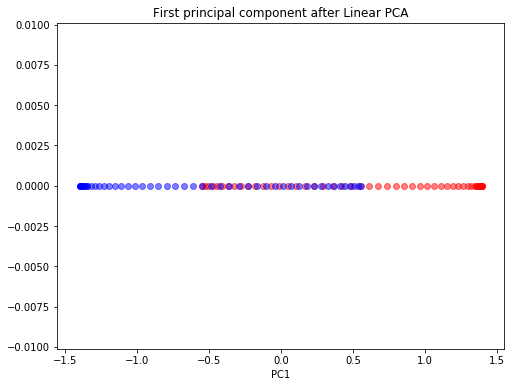

In [5]:
# Reduction to one
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

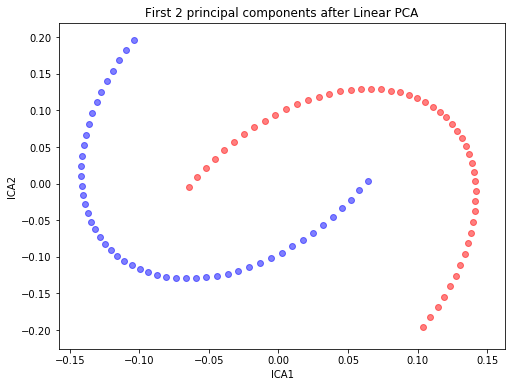

In [6]:
# 2 Component to ICA
scikit_pca = FastICA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.show()

(100, 1)


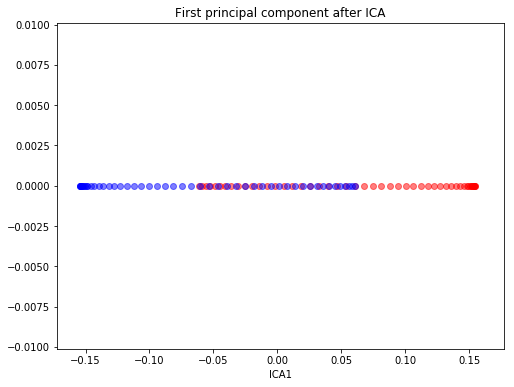

In [7]:
# Reduction to ICA
scikit_ica = FastICA(n_components=1)
X_spca = scikit_ica.fit_transform(X)

print(X_spca.shape)
plt.figure(figsize=(8,6))
plt.scatter(X_spca[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)

plt.title('First principal component after ICA')
plt.xlabel('ICA1')

plt.show()

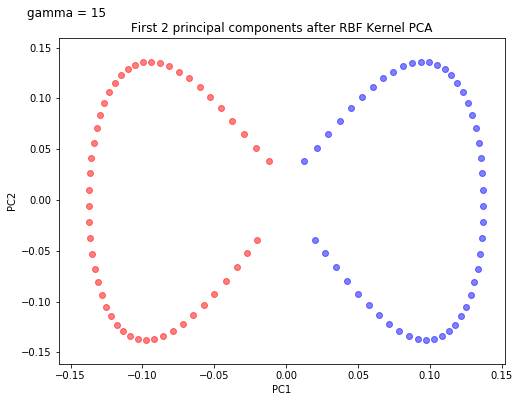

In [8]:
# show 2 step wise pca
X_pc = stepwise_kpca(X, gamma=15, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], X_pc[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], X_pc[y==1, 1], color='blue', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.text(-0.18, 0.18, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

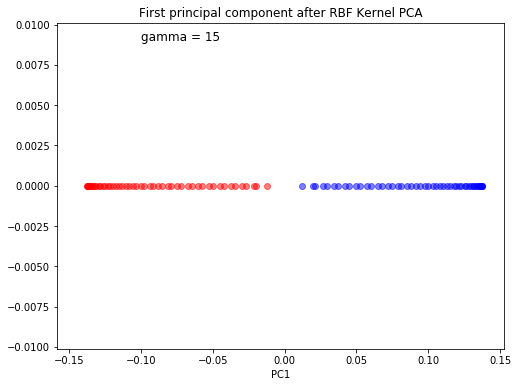

In [9]:
# show the 1 component 
plt.figure(figsize=(8,6))
plt.scatter(X_pc[y==0, 0], np.zeros((50)), color='red', alpha=0.5)
plt.scatter(X_pc[y==1, 0], np.zeros((50)), color='blue', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.text(-0.1, 0.009, 'gamma = 15', fontsize=12)
plt.xlabel('PC1')
plt.show()

In [17]:
# see the order in step by step
print(X.shape)
sq_dists = pdist(X, 'sqeuclidean')
print(sq_dists.shape)
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists.shape)


(100, 2)
(4950,)
(100, 100)


In [25]:
# create a new data set
temp = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
sq_dists = pdist(temp, 'sqeuclidean')
print(sq_dists)
mat_sq_dists = squareform(sq_dists)
print(mat_sq_dists.shape)
print(mat_sq_dists)
K = exp(-0.1 * mat_sq_dists)
print(K)
N = K.shape[0]
print(N)
one_n = np.ones((N,N)) / N
print(one_n)
K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
print(K)
# now from under me we need to sort the eigen values in the order
eigvals, eigvecs = eigh(K)

[ 27. 108.  27.]
(3, 3)
[[  0.  27. 108.]
 [ 27.   0.  27.]
 [108.  27.   0.]]
[[1.00000000e+00 6.72055127e-02 2.03995034e-05]
 [6.72055127e-02 1.00000000e+00 6.72055127e-02]
 [2.03995034e-05 6.72055127e-02 1.00000000e+00]]
3
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[ 0.65172304 -0.30346648 -0.34825656]
 [-0.30346648  0.60693297 -0.30346648]
 [-0.34825656 -0.30346648  0.65172304]]


In [32]:
! git add .
! git commit -m "from mac"
! git push

[master ac8f4700] from mac
 1 file changed, 24 insertions(+), 3 deletions(-)
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 919 bytes | 919.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   485d18ad..ac8f4700  master -> master
